In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#This zip objects packs each pair of lats and lngs having the same index in their respective array into a tuple


In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

601

In [11]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omsukchan
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | fort nelson
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | riachao das neves
Processing Record 15 of Set 1 | kuche
City not found. Skipping...
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | ingham
Processing Record 21 of Set 1 | provideniya
Processing Record 22 

Processing Record 37 of Set 4 | kenai
Processing Record 38 of Set 4 | konevo
Processing Record 39 of Set 4 | pilar
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | aksu
Processing Record 42 of Set 4 | koson
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | njeru
Processing Record 45 of Set 4 | bowen
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | kalakamati
Processing Record 48 of Set 4 | paamiut
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | lahat
Processing Record 5 of Set 5 | tilichiki
Processing Record 6 of Set 5 | atar
Processing Record 7 of Set 5 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | solovetskiy
City 

Processing Record 23 of Set 8 | vestmannaeyjar
Processing Record 24 of Set 8 | envira
Processing Record 25 of Set 8 | les cayes
Processing Record 26 of Set 8 | morros
Processing Record 27 of Set 8 | berezovyy
Processing Record 28 of Set 8 | bouar
Processing Record 29 of Set 8 | naples
Processing Record 30 of Set 8 | rio grande
Processing Record 31 of Set 8 | colesberg
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | mill valley
Processing Record 35 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 8 | backa palanka
Processing Record 37 of Set 8 | linares
Processing Record 38 of Set 8 | sao gabriel da cachoeira
Processing Record 39 of Set 8 | virginia beach
Processing Record 40 of Set 8 | purpe
Processing Record 41 of Set 8 | hami
Processing Record 42 of Set 8 | preston
Processing Record 43 of Set 8 | batemans bay
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | tuggurt
City not f

Processing Record 11 of Set 12 | sabha
Processing Record 12 of Set 12 | sharhorod
Processing Record 13 of Set 12 | bandarbeyla
Processing Record 14 of Set 12 | ribnitz-damgarten
Processing Record 15 of Set 12 | burla
Processing Record 16 of Set 12 | ornskoldsvik
Processing Record 17 of Set 12 | hailar
Processing Record 18 of Set 12 | kozhva
Processing Record 19 of Set 12 | te karaka
Processing Record 20 of Set 12 | bud
Processing Record 21 of Set 12 | mount isa
Processing Record 22 of Set 12 | andenes
Processing Record 23 of Set 12 | firozpur jhirka
Processing Record 24 of Set 12 | tahta
Processing Record 25 of Set 12 | hofn
Processing Record 26 of Set 12 | punta cardon
Processing Record 27 of Set 12 | sangar
Processing Record 28 of Set 12 | newport
Processing Record 29 of Set 12 | san jose
Processing Record 30 of Set 12 | ugoofaaru
Processing Record 31 of Set 12 | alugan
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | codrington
Processing Record 34 of Set 1

In [13]:
len(city_data)

547

In [14]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Omsukchan,62.5333,155.8000,68.05,47,100,5.46,RU,2022-08-14 04:57:10
1,Yellowknife,62.4560,-114.3525,63.12,55,20,4.61,CA,2022-08-14 04:58:07
2,Punta Arenas,-53.1500,-70.9167,33.91,93,75,8.05,CL,2022-08-14 04:56:09
3,Fort Nelson,58.8053,-122.7002,71.19,83,100,2.30,CA,2022-08-14 04:58:07
4,Thompson,55.7435,-97.8558,51.96,76,0,0.00,CA,2022-08-14 04:56:35
5,Rawson,-43.3002,-65.1023,50.16,41,95,27.83,AR,2022-08-14 04:58:08
6,Atuona,-9.8000,-139.0333,77.29,70,0,21.07,PF,2022-08-14 04:58:08
7,Hithadhoo,-0.6000,73.0833,82.85,70,78,4.00,MV,2022-08-14 04:58:09
8,Mataura,-46.1927,168.8643,50.49,72,14,5.35,NZ,2022-08-14 04:58:09
9,Lebu,-37.6167,-73.6500,48.38,82,100,7.49,CL,2022-08-14 04:58:10


In [15]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Omsukchan,RU,2022-08-14 04:57:10,62.5333,155.8000,68.05,47,100,5.46
1,Yellowknife,CA,2022-08-14 04:58:07,62.4560,-114.3525,63.12,55,20,4.61
2,Punta Arenas,CL,2022-08-14 04:56:09,-53.1500,-70.9167,33.91,93,75,8.05
3,Fort Nelson,CA,2022-08-14 04:58:07,58.8053,-122.7002,71.19,83,100,2.30
4,Thompson,CA,2022-08-14 04:56:35,55.7435,-97.8558,51.96,76,0,0.00
5,Rawson,AR,2022-08-14 04:58:08,-43.3002,-65.1023,50.16,41,95,27.83
6,Atuona,PF,2022-08-14 04:58:08,-9.8000,-139.0333,77.29,70,0,21.07
7,Hithadhoo,MV,2022-08-14 04:58:09,-0.6000,73.0833,82.85,70,78,4.00
8,Mataura,NZ,2022-08-14 04:58:09,-46.1927,168.8643,50.49,72,14,5.35
9,Lebu,CL,2022-08-14 04:58:10,-37.6167,-73.6500,48.38,82,100,7.49


In [24]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [25]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

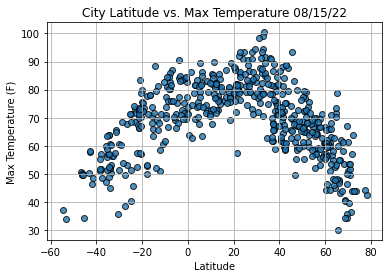

In [26]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

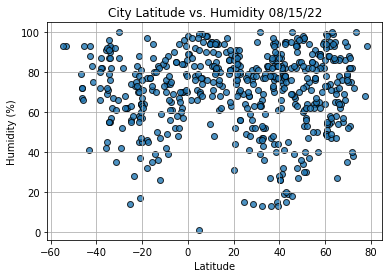

In [27]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()


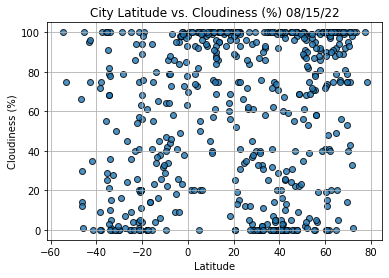

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

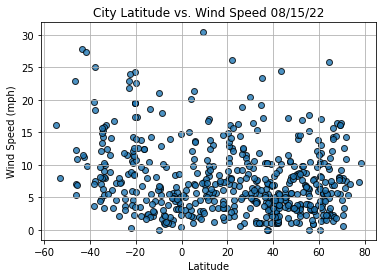

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Omsukchan,RU,2022-08-14 04:57:10,62.5333,155.8000,68.05,47,100,5.46
1,Yellowknife,CA,2022-08-14 04:58:07,62.4560,-114.3525,63.12,55,20,4.61
3,Fort Nelson,CA,2022-08-14 04:58:07,58.8053,-122.7002,71.19,83,100,2.30
4,Thompson,CA,2022-08-14 04:56:35,55.7435,-97.8558,51.96,76,0,0.00
10,Barrow,US,2022-08-14 04:58:10,71.2906,-156.7887,36.36,75,100,6.49


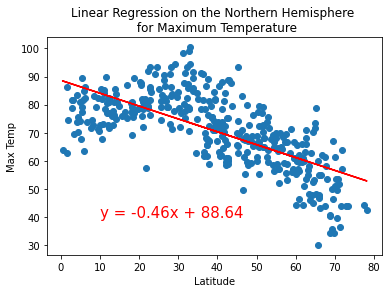

In [32]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

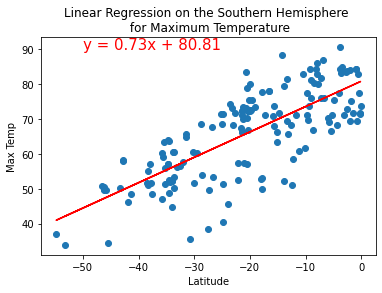

In [33]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

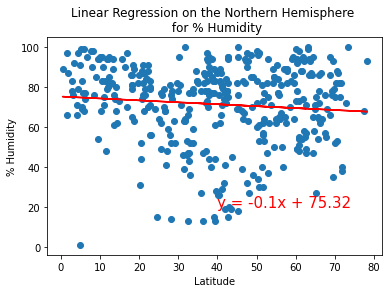

In [34]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

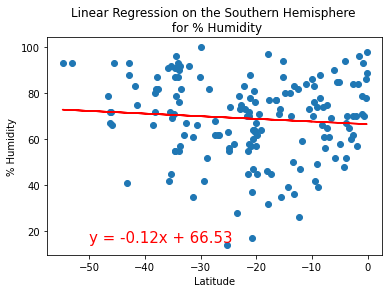

In [35]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))


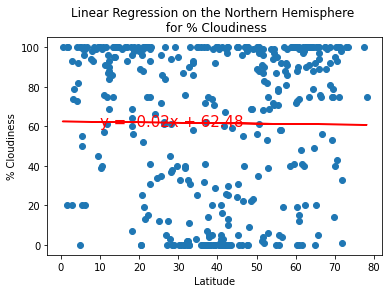

In [36]:

#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

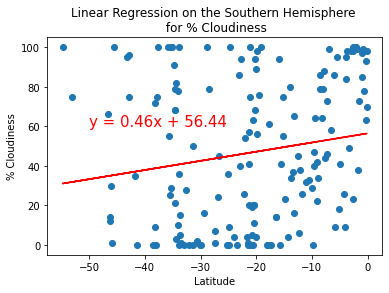

In [37]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

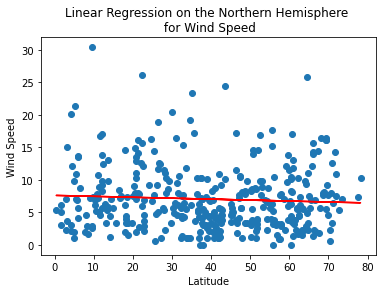

In [38]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

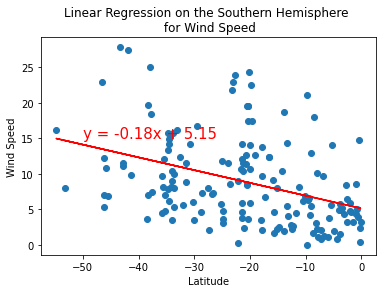

In [39]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))